**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 27 – Convolutional Neural Networks with TensorFlow**

# Convolutional Neural Networks with TensorFlow

Nok Wongpiromsarn, 8 August 2022

**Credit:** The large portion of the code has been taken from https://codelabs.developers.google.com/codelabs/tensorflow-lab4-cnns and https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

**Get the data and prepare it for CNN**

In [1]:
import numpy as np
from tensorflow import keras

# Split it into training set, validation set and test set
# as in L25-DeepNets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Need to reshape the data to 4D for convolutions to work properly.
# Recall that the shape is supposed to be
# [size, height, width, channels].
# In this case, we only have 1 channel (grayscale).
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_valid = X_valid.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

**Build a sequential model with convolutional layers**

In [2]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
            metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


1719/1719 [==============================] - 8s 3ms/step - loss: 0.5000 - accuracy: 0.8205 - val_loss: 0.3193 - val_accuracy: 0.8862
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8784 - val_loss: 0.2661 - val_accuracy: 0.9030
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.8954 - val_loss: 0.2417 - val_accuracy: 0.9106
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9070 - val_loss: 0.2212 - val_accuracy: 0.9194
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2353 - accuracy: 0.9146 - val_loss: 0.2331 - val_accuracy: 0.9114
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9211 - val_loss: 0.2189 - val_accuracy: 0.9206
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1991 - accuracy: 0.9265 - val_loss: 0.2090 - val_accuracy: 0.9220
Epo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()

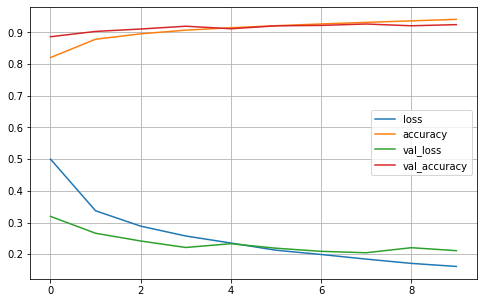

In [4]:
plot_learning_curves(history)

**Evaluate the model on the test set**

In [5]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.9156
Test loss: 0.2330790013074875, Test accuracy: 91.56000018119812


**Visualize the convolutions and pooling**

Visualize the result of running the convolution on some images of the same class and see how common features between them emerge

[9 9 9]
1/1 [==============================] - 0s 14ms/step


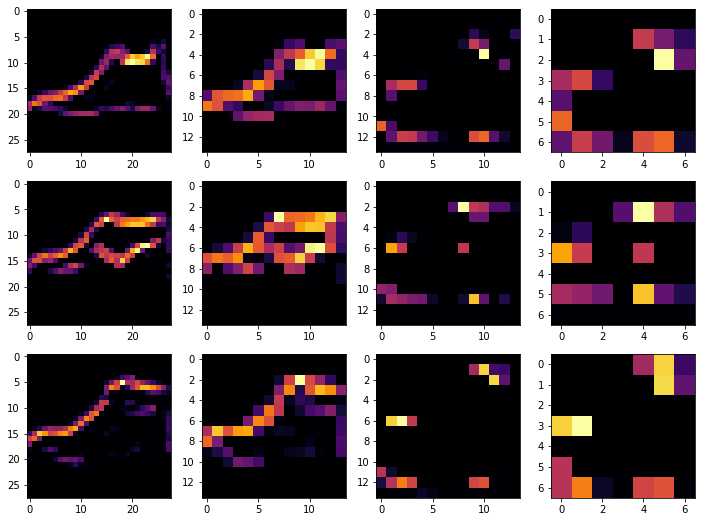

In [6]:
f, axarr = plt.subplots(3,4, figsize=(12, 9))

filter_index = 6 # The index of the filter (0-63) on each layer
image_indices = [0, 23, 28] # All these images are labeled ankle boot (9)
print(y_test[image_indices])

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Look at the output after the first 4 layers, i.e., before flattening the input
for layer in range(0,4):
    for row, image_index in enumerate(image_indices):
        f = activation_model.predict(X_test[image_index].reshape(1, 28, 28, 1))[layer]
        axarr[row, layer].imshow(f[0, : , :, filter_index], cmap='inferno')
        axarr[row, layer].grid(False)